In [9]:
import json
import plotly
import pandas as pd
import joblib

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from flask import Flask
from flask import render_template, request, jsonify
from plotly.graph_objs import Bar
# from sklearn.externals import joblib
from sqlalchemy import create_engine

import re
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
# load data
engine = create_engine('sqlite:///../data/disaster_response.db')
df = pd.read_sql_table('disaster_response', engine)

In [3]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [4]:
tokenize(df.message[0])

['weather',
 'update',
 '-',
 'a',
 'cold',
 'front',
 'from',
 'cuba',
 'that',
 'could',
 'pas',
 'over',
 'haiti']

In [5]:
def tokenize(message, stem='lemm'):
    """Text processing.
    
    Args:
        stem(str): stem or lemm.
        
    Returns:
        list: Cleaned tokens.
    """
    # 1. Cleaning

    # 2. Normalization
    text = re.sub(r"[^a-zA-Z0-9]", " ", message.lower())

    # 3. Tokenization
    tokens = word_tokenize(text)

    # 4. Stop Word Removal
    stop_words = stopwords.words("english")
    tokens = list(filter(lambda w: w not in stop_words, tokens))

    # 5. Part of Speech Tagging / Named Entity Recognition

    # 6. Stemming or Lemmatization
    # Because the targets are not roots, we should use Lemmatization

    clean_tokens = []
    if stem == 'stem':
        stemmer = PorterStemmer()
        for tok in tokens:
            clean_tok = stemmer.stem(tok).strip()
            clean_tokens.append(clean_tok)
    else:
        lemmatizer = WordNetLemmatizer()
        for tok in tokens:
            clean_tok = lemmatizer.lemmatize(tok).strip()
            clean_tokens.append(clean_tok)

    return clean_tokens

In [10]:
tokenize(df.message[0])

['weather', 'update', 'cold', 'front', 'cuba', 'could', 'pas', 'haiti']

In [11]:
WordNetLemmatizer.lemmatize?

Signature: WordNetLemmatizer.lemmatize(self, word: str, pos: str = 'n') -> str
Docstring:
Lemmatize `word` using WordNet's built-in morphy function.
Returns the input word unchanged if it cannot be found in WordNet.

:param word: The input word to lemmatize.
:type word: str
:param pos: The Part Of Speech tag. Valid options are `"n"` for nouns,
    `"v"` for verbs, `"a"` for adjectives, `"r"` for adverbs and `"s"`
    for satellite adjectives.
:param pos: str
:return: The lemma of `word`, for the given `pos`.
File:      /usr/local/lib/python3.9/site-packages/nltk/stem/wordnet.py
Type:      function


In [12]:
genre_counts = df.groupby('genre').count()['message']

In [15]:
genre_names = list(genre_counts.index)

In [16]:
genre_names

['direct', 'news', 'social']

In [17]:
import plotly.express as px

In [38]:
df.loc[:, 'related':]

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26213,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26214,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.related.count()

26216

In [22]:
df[df.related != 0].shape

(20094, 40)

In [30]:
df.request.count()

26216

In [40]:
df.loc[:, 'related':].related.value_counts()

1    19906
0     6122
2      188
Name: related, dtype: int64

In [41]:
df.loc[:, 'related':].request.value_counts()

0    21742
1     4474
Name: request, dtype: int64

In [47]:
df.loc[:, 'related':].head().value_counts()

related  request  offer  aid_related  medical_help  medical_products  search_and_rescue  security  military  child_alone  water  food  shelter  clothing  money  missing_people  refugees  death  other_aid  infrastructure_related  transport  buildings  electricity  tools  hospitals  shops  aid_centers  other_infrastructure  weather_related  floods  storm  fire  earthquake  cold  other_weather  direct_report
1        0        0      0            0             0                 0                  0         0         0            0      0     0        0         0      0               0         0      0          0                       0          0          0            0      0          0      0            0                     0                0       0      0     0           0     0              0                3
                         1            0             0                 0                  0         0         0            0      0     0        0         0      0               

In [51]:
df.loc[:, 'related':].related.value_counts().to_frame()

,related
1,19906
0,6122
2,188


In [52]:
df.loc[:, 'related':].request.value_counts().to_frame()

,request
0,21742
1,4474


In [172]:
_df = pd.DataFrame()
for col in df.loc[:, 'related':].columns:
    _df = pd.concat([_df, df[col].value_counts().to_frame()], axis=1)

_df = _df.transpose()
_df = _df.reset_index()
_df.rename(columns={'index': 'categories'}, inplace=True)
# unpivot _df and don't count value 0
_df = _df.melt(id_vars=['categories'], value_vars=[1, 2], var_name='value', value_name='counts')

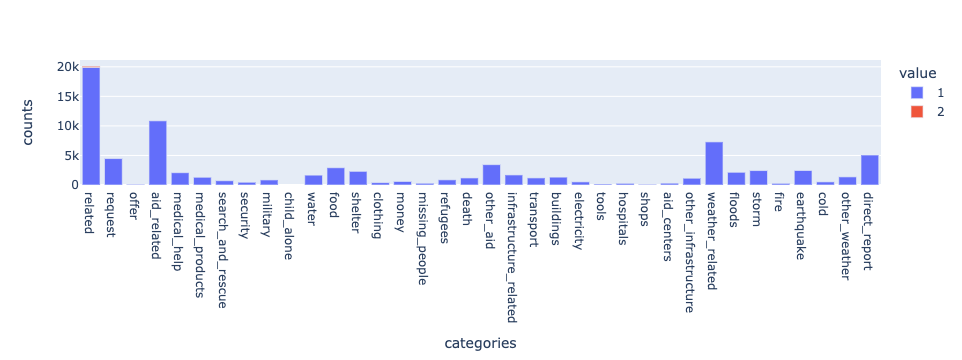

In [185]:
px.bar(_df, x='categories', y='counts', color='value', orientation='v')

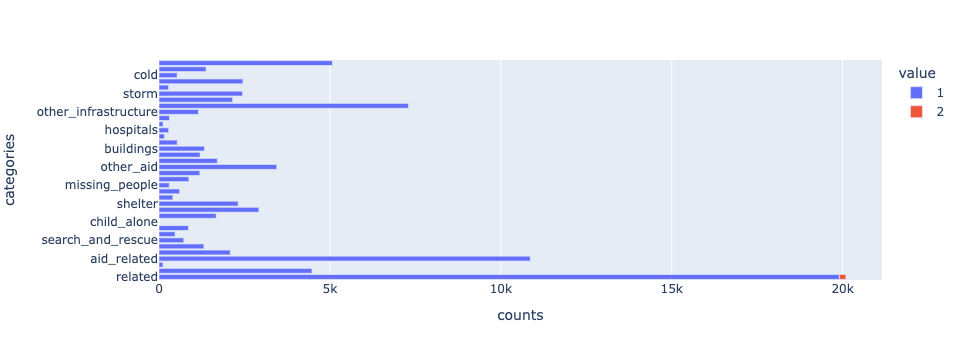

In [182]:
px.bar(_df, x='counts', y='categories', color='value', orientation='h')

In [184]:
px.bar?

Signature:
px.bar(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a bar plot, each row of `data_frame` is represented as a rectangular

In [181]:
_df

,categories,value,counts
0,related,1,19906.0
1,request,1,4474.0
2,offer,1,118.0
3,aid_related,1,10860.0
4,medical_help,1,2084.0
...,...,...,...
67,fire,2,NaN
68,earthquake,2,NaN
69,cold,2,NaN
70,other_weather,2,NaN


In [171]:
df.loc[:, 'related':].related.

20282